In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib inline
sns.set_style('darkgrid')

import ydata_profiling # pandas_profiling!!!! отменяется c 1-го апреля 2023 г

import warnings
warnings.filterwarnings("ignore")

np.random.seed(45) # чтобы выборки данных всегда были одни и теже берем любую цифру . мне нравится 45!

In [2]:
data_main = pd.read_csv(r'C:\Users\grain\Work_folder\Diplom_MGTU\Diploma2_inspect\data_main.csv')
data_main.head()

,pattern_angle,step_strip,density_strip,ratio_filler_matrix,density,elasticity_module,number_hardeners,content_epoxy_groups,flash_temperature,surface_density,elasticity_module_stretching,strapery_strength,resin_consumption
0,0.0,4.0,60.0,1.857,2030.0,738.737,50.00,23.750,284.615,210.0,70.0,3000.0,220.0
1,0.0,5.0,47.0,1.857,2030.0,738.737,129.00,21.250,300.000,210.0,70.0,3000.0,220.0
2,0.0,5.0,57.0,2.771,2030.0,753.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0
3,0.0,5.0,60.0,2.768,2000.0,748.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0
4,0.0,5.0,70.0,2.570,1910.0,807.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0


In [7]:
data_main.shape

(948, 13)

In [ ]:
Продолжаем работу над исследованием нашего df - data_main

In [ ]:
# Начало блока исследования коэффициентов корреляции_________________________________________________________

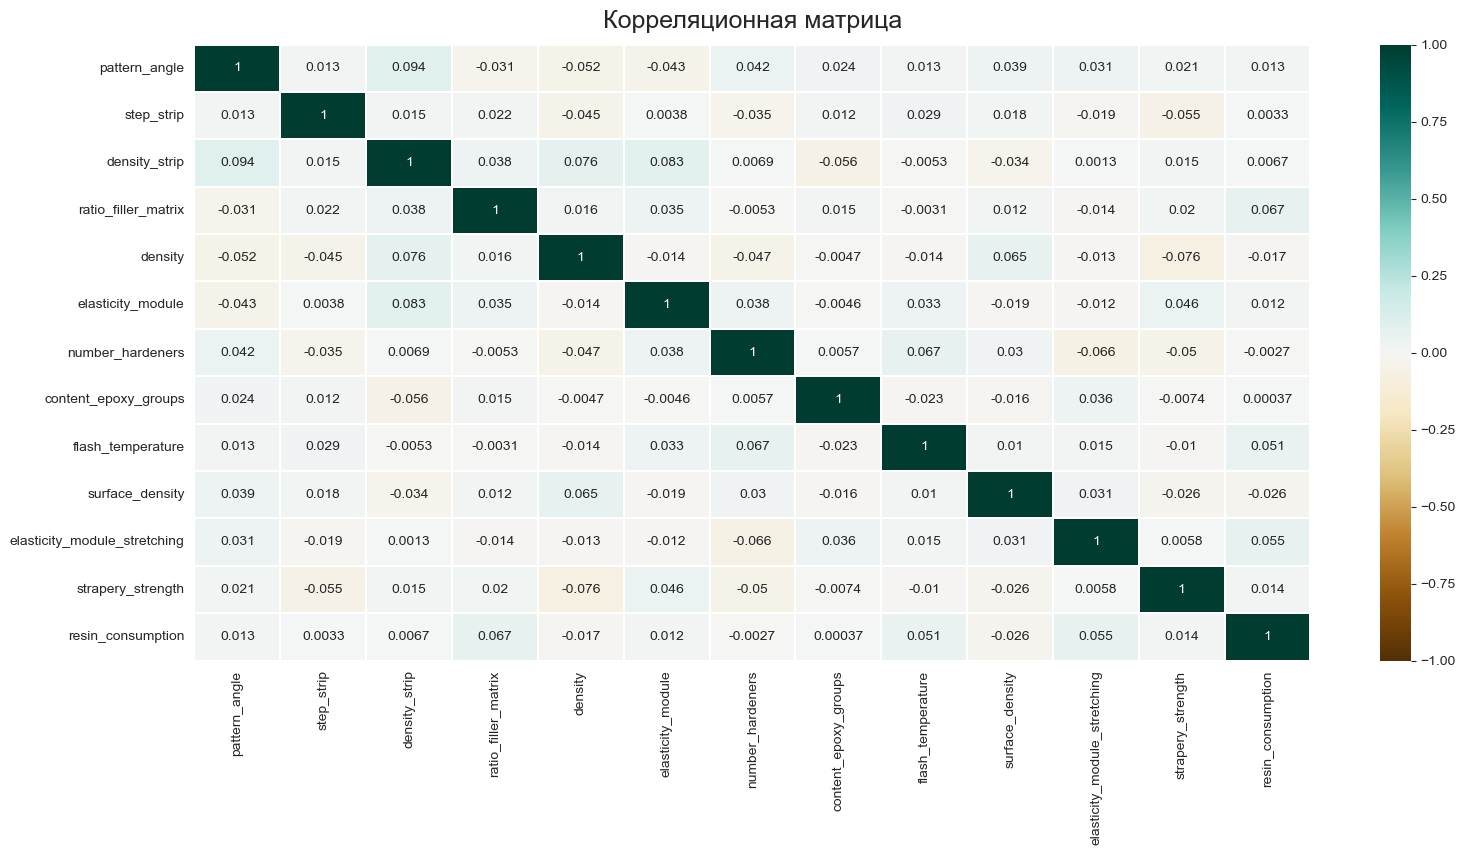

In [3]:
# Построим корреляционную матрицу
plt.figure(figsize=(18,8))
corr_heatmap = sns.heatmap(data_main.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)
corr_heatmap.set_title('Корреляционная матрица', fontdict={'fontsize': 18}, pad=12)
plt.show()
#plt.savefig('corr_heatmap.png')

In [4]:
# Максимальные корреляции в нащем df для полного объема строк 
print(data_main.corr().abs().apply(lambda x: sorted(x)[-2]))

pattern_angle                   0.093639
step_strip                      0.055139
density_strip                   0.093639
ratio_filler_matrix             0.066974
density                         0.076269
elasticity_module               0.082671
number_hardeners                0.067194
content_epoxy_groups            0.055931
flash_temperature               0.067194
surface_density                 0.064925
elasticity_module_stretching    0.065524
strapery_strength               0.075987
resin_consumption               0.066974
dtype: float64


In [ ]:
# DF для максимумов коэффициентов корреляции для разных значений количества  строк выборки значений от 100 до 948
df_corr_value = pd.DataFrame(columns= [100, 200, 300, 400, 500, 600, 700, 800, len(data_main)],
                             index = list(data_main)
                            )

In [ ]:
df_corr_value.head(13)

# Сначала сделаем для ПЕРВЫХ N-строк, а затем сделаем для СЛУЧАЙНЫХ N -строк
# для ПЕРВЫХ N-строк

In [ ]:
# Взято df.head(column).corr().abs().apply(lambda x: sorted(x)[-2]) 
# из https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

# Функция value_corr_show заполняет df_corr_value максимальными значениями для коэффициентов корреляции по каждому параметру
# при разных значениях N -числа СЛУЧАЙНЫХ выборок из нашего DataFrame от 100 до len(df)
# df - наш основной исследуемый DF
# df_corr_value - df для максимальных значений коэффициентов корреляции 
# при разных значениях N - количества СЛУЧАЙНЫХ  выбраных значений из DF

def value_corr_show(df, df_corr_value):
    for column in df_corr_value.columns:
        df_corr_value[column] = df.head(column).corr().abs().apply(lambda x: sorted(x)[-2]) # sample(n=column)sample(n=7)head(column)
    return(df_corr_value)

In [ ]:
value_corr_show(data_main, df_corr_value)

In [ ]:
print('Графики изменения размереа корреляции от количества ПЕРВЫХ N строк выборки')
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
for index in range(len(df_corr_value)):
    x = df_corr_value.columns 
    y = df_corr_value.iloc[index]
    plt.plot( x, y, label= df_corr_value.index[index])
    plt.xlabel('Количество элементов в выборке N', fontsize=10, color='blue')
    plt.ylabel('Коэффициент корреляции МАХ', fontsize=10, color='blue')
    plt.legend()
    plt.grid(True)   
    #plt.show() # если включить , то будут рисоваться все 13 графиков на отдельных фреймах
      

In [ ]:
# Рассмотрим более внимательно каждый график отдельно

In [ ]:
print('Графики изменения размереа корреляции от количества ПЕРВЫХ N строк выборки')
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
for index in range(len(df_corr_value)):
    x = df_corr_value.columns 
    y = df_corr_value.iloc[index]
    plt.plot( x, y, label= df_corr_value.index[index])
    plt.xlabel('Количество элементов в выборке N', fontsize=10, color='blue')
    plt.ylabel('Коэффициент корреляции МАХ', fontsize=10, color='blue')
    plt.legend()
    plt.grid(True)   
    plt.show() # если включить , то будут рисоваться все 13 графиков на отдельных фреймах
      

# Максимальный коэффициент корреляции каждого параметра ПАДАЕТ при уменьшении количества элементов в выборке df.head(N)

In [ ]:
# Максимальные корреляции в нащем df для 100  строк 
print(data_main.head(100).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Максимум корреляции у нас наблюдается между параметром 
'surface_density'  и целевой переменной 'elasticity_module_stretching'   corr = 0.384 при выборке ПЕРВЫХ N =100

In [ ]:
# Максимальные корреляции в нащем df для 948  строк 
print(data_main.head(948).corr().abs().apply(lambda x: sorted(x)[-2]))

# Динамика максимальных коэффициентов корреляции для варианта :
# СЛУЧАЙНЫХ N -строк

In [ ]:
# DF для максимумов коэффициентов корреляции для разных значений количества  строк выборки значений от 100 до 948
df_corr_value_random = pd.DataFrame(columns= [100, 200, 300, 400, 500, 600, 700, 800, len(data_main)],
                             index = list(data_main)
                            )

In [ ]:
df_corr_value_random.head(13)

In [ ]:
# Функция value_corr_show заполняет df_corr_value_random максимальными значениями для коэффициентов корреляции по каждому параметру
# при разных значениях N -числа СЛУЧАЙНЫХ выборок из нашего DataFrame от 100 до len(df)
# df - наш основной исследуемый DF
# df_corr_value_random - df для максимальных значений коэффициентов корреляции 
# при разных значениях N - количества СЛУЧАЙНЫХ  выбраных значений из DF
# random_state = 42!!

def value_corr_show_random(df, df_corr_value_random):
    for column in df_corr_value.columns:
        df_corr_value_random[column] = df.sample(n=column, random_state=42).corr().abs().apply(lambda x: sorted(x)[-2]) # sample(n=7)head(column)
    return(df_corr_value_random)

In [ ]:
value_corr_show_random(data_main, df_corr_value_random)

In [ ]:
print('Графики изменения размереа корреляции от количества СЛУЧАЙНЫХ  N строк выборки')
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
for index in range(len(df_corr_value_random)):
    x = df_corr_value_random.columns 
    y = df_corr_value_random.iloc[index]
    plt.plot( x, y, label= df_corr_value_random.index[index])
    plt.xlabel('Количество элементов в выборке N', fontsize=10, color='blue')
    plt.ylabel('Коэффициент корреляции МАХ', fontsize=10, color='blue')
    plt.legend()
    plt.grid(True)   
    # plt.show() # если включить , то будут рисоваться все 13 графиков на отдельных фреймах
      

In [ ]:
# Рассмотрим более внимательно каждый график отдельно

In [ ]:
print('Графики изменения размереа корреляции от количества  N строк выборки')
fig, axs = plt.subplots(1, 1, figsize=(12, 7))
for index in range(len(df_corr_value_random)):
    x = df_corr_value_random.columns 
    y = df_corr_value_random.iloc[index]
    plt.plot( x, y, label= df_corr_value_random.index[index])
    plt.xlabel('Количество элементов в выборке N', fontsize=10, color='blue')
    plt.ylabel('Коэффициент корреляции МАХ', fontsize=10, color='blue')
    plt.legend()
    plt.grid(True)   
    plt.show() # если включить , то будут рисоваться все 13 графиков на отдельных фреймах
      

# Максимальный коэффициент корреляции каждого параметра ПАДАЕТ при увеличении количества элементов в выборке df.sample(n=N,random_state=42)

In [ ]:
# Максимальные корреляции в нащем df для СЛУЧАЙНЫХ 100  строк 
print(data_main.sample(n=100, random_state=42).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Максимум корреляции у нас наблюдается между параметром 
'surface_density'  и целевой переменной 'elasticity_module_stretching'   corr = 0.384 при выборке N =100

In [ ]:
# Максимальные корреляции в нащем df для 948  строк 
print(data_main.sample(n=948, random_state=42).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Максимальные корреляции в нащем df для 948  строк 
print(data_main.head(948).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Конец блока исследования коэффициентов корреляции_________________________________________________________

In [ ]:
# Рассмотрим другие типы графиков 2D. 

In [ ]:
# перед проведением больших  расчетов и графических построений понизим размерность нашего df

In [ ]:
# Функция оптимизации типов в dataframe.

# !!!! Код взят из источника https://github.com/ellavs/python-pandas-optimize-dataframe-memory-usage

def optimize_memory_usage(df, print_size=True):

    # Типы, которые будем проверять на оптимизацию.
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    # Memory usage size before optimize (Mb).
    # (RU) Размер занимаемой памяти до оптимизации (в Мб).
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Memory usage size after optimize (Mb).
    # Размер занимаемой памяти после оптимизации (в Мб).
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Memory usage size: before {:5.4f} Mb - after {:5.4f} Mb ({:.1f}%).'.format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

def import_data_from_csv(df):
    # Показать информацию о таблице до оптимизации.
    print('-' * 80)
    print(df.info())
    print('-' * 80)
    # Оптимизация типов в dataframe.
    df = optimize_memory_usage(df) # используем функцию optimize_memory_usage , созданую выше
    # Показать информацию о таблице после оптимизации.
    print('-' * 80)
    print(df.info())
    print('-' * 80)
    return df

In [ ]:
# Вызываем функцию import_data_from_csv для уменьшения размерности переменных в файле df_bp_new

data_main = import_data_from_csv(data_main)

In [ ]:
# В нашем DF data_main уменьшилась размерность до float32 и размер памяти уменьшился с 96,4 кв до 48,3 кв

In [ ]:
# График зависимости парметров друг от друга
# Взято из https://pyprog.pro/sns/sns_6_visualization_of_dist.html
# При построении точечных диаграмм зависимостей используем график прямой регрессии в правом верхнем углу.
# Наблюдения проведем при выборке 100  и 948 значений.

# Создаем экземпляр класса:
g = sns.PairGrid(data_main)

# задаем тип графиков над главной диагональю:это графики точек с линией регрессии
g.map_upper(sns.regplot)

# задаем тип графиков под главной диагональю: 
g.map_lower(sns.kdeplot, bw_adjust= 0.5, lw=3)

# задаем тип графиков на главной диагонали:
g.map_diag(sns.histplot, kde=True, bins = 30, fill = True);

У нас пока не наблюдается регрессия в параметрах.
Проведем юолее тщательные графические ислледования возможных зависимых парметров

In [ ]:
В задании к ВКР целевыми переменными заданы 'elasticity_module_stretching' и 'strapery_strength'
Проверим для каждой целевой переменной зависимости от параметров с выедением регрессионной прямой на графиках зависимости

In [ ]:
# Функция печати зависимости  параметров  от целевой переменной с выводом линии регрессии
# Параметры для передачи в функцию:
# df - наш dataframe
# N - количество случайных элементов для выборки графика
# f_x - размер в figsize по оси Х
# f_y - размер в figsize по оси Y

# name_у - исследуемая целевая переменная по оси У

def regplot_plt(df, N, fig_x, fig_y, name_Y):
    for column in df.columns:
        if column == name_Y:
            continue
        fig, axes = plt.subplots(1, 1, figsize=(fig_x, fig_y,))
        sns.regplot(data = df.head(N),
                    x = df.head(N)[column], 
                    y = name_Y,
                    ci=None,
                ) # ci=None- без доверительного интервала!
    plt.show()
    return     

In [ ]:
# Построим графики при N = 100 для целевой переменной 'elasticity_module_stretching'
regplot_plt(data_main, N=100, fig_x= 6, fig_y = 4, name_Y=  'elasticity_module_stretching')

In [ ]:
data_main.columns.tolist()

In [ ]:
Как видно из графиков при N = 100 между  целевой переменной 'elasticity_module_stretching'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip', 'density', 'elasticity_module',content_epoxy_groups',
б) слабая корреляция наблюдается  с параметрами :
'ratio_filler_matrix', 'number_hardeners', 'flash_temperature', 'resin_consumption'
в) наблюдается более сильная корреляцияа с парметрами:
'surface_density', 'strapery_strength' 

In [ ]:
# Построим графики при N = len(data_main) для целевой переменной 'elasticity_module_stretching'
regplot_plt(data_main, N= len(data_main), fig_x= 6, fig_y = 4, name_Y=  'elasticity_module_stretching')

In [ ]:
Как видно из графиков при N = 948 между  целевой переменной 'elasticity_module_stretching'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip', 'density',  'flash_temperature','elasticity_module','content_epoxy_groups','strapery_strength' 
б) слабая корреляция наблюдается  с параметрами :
'number_hardeners', 'surface_density','resin_consumption'

In [ ]:
## Вероятно, можно проводить регрессивный анализ по целевой переменной  'elasticity_module_stretching'
с параметрами 'number_hardeners', 'surface_density','resin_consumption'

In [ ]:
Проведем такой же анаализ при N = 100 и N = 948 для второй целевой переменной 'strapery_strength'

In [ ]:
# Построим графики при N = 100 для целевой переменной 'elasticity_module_stretching'
regplot_plt(data_main, N=100, fig_x= 6, fig_y = 4, name_Y= 'strapery_strength')

In [ ]:
Как видно из графиков при N = 100 между  целевой переменной 'strapery_strength'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip','ratio_filler_matrix', 'density', content_epoxy_groups','resin_consumption'
б) слабая корреляция наблюдается  с параметрами :
'number_hardeners', 'flash_temperature', 'elasticity_module'
в) наблюдается более сильная корреляцияа с парметрами:
'surface_density', 'elasticity_module_stretching' 

In [ ]:
# Построим графики при N = len(data_main) для целевой переменной 'elasticity_module_stretching'
regplot_plt(data_main, N= len(data_main), fig_x= 6, fig_y = 4, name_Y= 'strapery_strength')

In [ ]:
Как видно из графиков при N = 948 между  целевой переменной 'strapery_strength'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip', 'flash_temperature','elasticity_module','content_epoxy_groups',
'elasticity_module_stretching', 'resin_consumption'
б) слабая корреляция наблюдается  с параметрами :
'density' 'number_hardeners','surface_density'

# Вероятно, можно проводить регрессивный анализ по целевой переменной  'strapery_strength'с параметрами 'density', 'number_hardeners','surface_density'

# В соответствии с теорией хрупкого разрушения (теория Гриффита) прочность (σр) определяется удельной энергией (α)
# вновь образованной поверхности разрушения: (σр) = f( α * Е) где Е – модуль упругости материала
т.е. (σр) это 'Прочность при растяжении' - 'strapery_strength' (размерность в Мпа),  
а E  это 'Модуль упругости при растяжении' - 'elasticity_module_stretching'(размерность в ГПа ,т.е в 1000 раз болье чем σр)
введем еще оди признак/столбец - 'удельную энергию ' - 'energy density' (α) = σр / Е


In [ ]:
# Функция расчта нового признака ALFA
# df - Передаем в функцию dataframe
# data_main_add_col - возвращаем df- с новым добавленым столбцом ALFA,  
# а также удалим два столбца:  'strapery_strength' и 'elasticity_module_stretching'

def add_column_alfa(df):
    df_add_col = df.assign(alfa = df.strapery_strength /df.elasticity_module_stretching)
    df_add_col =  df_add_col.drop(['strapery_strength', 'elasticity_module_stretching'], axis=1)
    return(df_add_col)

In [ ]:
df_add_col = add_column_alfa(data_main)

In [ ]:
df_add_col.info()

In [ ]:
Проведем такой же анаализ при N = 100 и N = 948 для новой целевой переменной 'alfa'

In [ ]:
# Построим графики при N = 100 для целевой переменной 'alfa'
regplot_plt(df_add_col, N= 100, fig_x= 6, fig_y = 4, name_Y= 'alfa')

Как видно из графиков при N = 100 между  целевой переменной 'alfa'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip', 'density',  'resin_consumption',  'content_epoxy_groups' 
б) слабая корреляция наблюдается  с параметрами :
ratio_filler_matrix, 'elasticity_module','number_hardeners', 'surface_density','flash_temperature'

In [ ]:
# Построим графики при N = len(df_add_col) для целевой переменной 'alfa'
regplot_plt(df_add_col, N= len(df_add_col), fig_x= 6, fig_y = 4, name_Y= 'alfa')

Можно сделать вывод, что можно попробовать сделать регрессивный анализ 
для целевой переменной ALFA по параметрам 'number_hardeners','surface_density'

# Выбор признаков (фич)

## Вероятно, можно проводить регрессивный анализ по целевой переменной  'elasticity_module_stretching'
с параметрами 'number_hardeners', 'surface_density','resin_consumption'

# Вероятно, можно проводить регрессивный анализ по целевой переменной  'strapery_strength'
с параметрами 'density', 'number_hardeners','surface_density'

# Вероятно, можно проводить регрессивный анализ по целевой переменной  'alfa'
с параметрами 'density', elasticity_module, 'number_hardeners','surface_density'

In [ ]:
# Анализируя 3 проанализированные варианта целевых переменных, 
# вероятно можно проводить регрессивный анализ по целевой переменной ALFA 
# и параметрами 'density', 'number_hardeners','surface_density'

In [ ]:
df_add_col.describe()

In [ ]:
# Попробуем проверить будет ли улучшение зависимости целевой переменной ALFA от параметров при изменение их характера - 3 метода:
1) возведение в квадрат
2) возведение в 3 степень 
3) логарифмирование параметров

Вариант 1. Попробуем возвести параметры в квадрат и провести графический анализ нового df

In [ ]:
df_sqwer = df_add_col ** 2

In [ ]:
df_sqwer.describe()

In [ ]:
# Построим корреляционную матрицу
plt.figure(figsize=(24, 12))
corr_heatmap = sns.heatmap(df_sqwer.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()
#plt.savefig('corr_heatmap.png')

In [ ]:
# Максимальные корреляции в нащем df для полного объема строк 
print(df_sqwer.corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Построим графики при N = len(df_sqwer) для целевой переменной 'alfa'
regplot_plt(df_sqwer, N= len(df_sqwer), fig_x= 6, fig_y = 4, name_Y= 'alfa')

In [ ]:
# Проверим графики зависимости целевой переменной "elasticity_module_stretching" от квадратов других параметров
sns.pairplot(df_sqwer, diag_kind='kde', hue="alfa")

In [ ]:
# В этом варианте № 1 не просматривается зависимости параметров с целевой переменной ALFA

In [ ]:
Вариант 2. Попробуем возвести параметры в куб и провести графический анализ нового df

In [ ]:
df_trio = df_add_col ** 3

In [ ]:
# Построим корреляционную матрицу
plt.figure(figsize=(18, 8))
corr_heatmap = sns.heatmap(df_trio.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()
#plt.savefig('corr_heatmap.png')

In [ ]:
# Максимальные корреляции в нащем df для полного объема строк 
print(df_trio.corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Построим графики при N = len(df_sqwer) для целевой переменной 'alfa'
regplot_plt(df_trio, N= len(df_sqwer), fig_x= 6, fig_y = 4, name_Y= 'alfa')

In [ ]:
# Проверим графики зависимости целевой переменной "elasticity_module_stretching" от квадратов других параметров
sns.pairplot(df_trio, diag_kind='kde', hue="alfa")

In [ ]:
# В этом варианте № 2 не просматривается зависимости параметров с целевой переменной ALFA

In [ ]:
Вариант 3. Попробуем возвести параметры в логарифм и провести графический анализ нового df

In [ ]:
df_log = np.log10(df_add_col)

In [ ]:
df_log.describe() 

In [ ]:
# Удалим первый столбец pattern_angle так как там есть значения NaN
df_log_drop = df_log.drop(['pattern_angle'], axis=1)

In [ ]:
df_log_drop.describe()

In [ ]:
# Построим корреляционную матрицу
plt.figure(figsize=(18, 8))
corr_heatmap = sns.heatmap(df_log_drop.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()
#plt.savefig('corr_heatmap.png')

In [ ]:
# Максимальные корреляции в нащем df для полного объема строк 
print(df_log_drop.corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Сравним  Максимальные корреляции в нащем основном df data_main для 948  строк с мах коррр варианта 3 
print(data_main.head(948).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Практически никаких улучшений этот вариант 3 нам не дал.

In [ ]:
# Построим графики при N = len(df_sqwer) для целевой переменной 'alfa'
regplot_plt(df_log_drop, N= len(df_log_drop), fig_x= 6, fig_y = 4, name_Y= 'alfa')

In [ ]:
# Вероятно, по варианту3  можно проводить регрессивный анализ по целевой переменной  'ALFA'
с параметрами 'step_strip', 'density', 'surface_density'

# Вывод! Наши 3 варианта - х2, х3 и log -  не дали явного улучшения выявления зависимости целевой переменной  ALFA от параметров основного df - data-main.

# ________________________________

In [ ]:
# Разделим наш df 'df_add_col' (в котором введен новый целевой параметр 'alfa' и удалены два параметра 'strapery_strength', 'elasticity_module_stretching'
# на 2 dataframe по признаку  Угол нашивки - pattern_angle, так как этот признак имеет всего 2 значения 0 и 90 градусов и посмотрим возможные корреляции.

In [ ]:
df_0 = df_add_col[df_add_col['pattern_angle'] == 0.0]

df_90 = df_add_col[df_add_col['pattern_angle'] == 90.0]

In [ ]:
# Удалим столбец Угол нашивки - pattern_angle в обоих df

In [ ]:
df_0 = df_0.drop(['pattern_angle'], axis=1)

In [ ]:
df_90 = df_90.drop(['pattern_angle'], axis=1)

In [ ]:
df_0.describe()

In [ ]:
df_0.info()

In [ ]:
df_90.describe()

In [ ]:
df_90.info()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0

In [ ]:
# Проведем исследование df df_0

In [ ]:
# Проверим графики зависимости целевой переменной "alfa" от других параметров
sns.pairplot(df_0.head(470), diag_kind='kde', hue="alfa")

In [ ]:
# ПАроверим корреляцию 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_0.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)

In [ ]:
# Максимальные корреляции в нащем основном df df_0 для 470  строк
print(df_0.head(470).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# В связи с уменьшением количества элементов-строк в df df_0 - у нас увеличились макс коэффициенты корреляции

In [ ]:
# Проверим  получится ли близким коэф корреляции на основном df df_add_col при N = 470

In [ ]:
print(df_0.head(470).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Как видим существенных отличий нет

In [ ]:
# Проведем исследование df df_90

In [ ]:
# Проверим графики зависимости целевой переменной "alfa" от других параметров
sns.pairplot(df_90.head(478), diag_kind='kde', hue="alfa")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_90.corr(), vmin=-1, vmax=1, center=0, cmap="BrBG",
                           linewidths=0.1, annot=True)

In [ ]:
# Максимальные корреляции в нащем основном df df_0 для 470  строк
print(df_90.head(478).corr().abs().apply(lambda x: sorted(x)[-2]))

In [ ]:
# Как видим, коэффициенты корреляции для df df_90 - оказались еще ниже , чем для df df_0!!!!!

# Выбор признаков (фич)

Таким образом, предлагается взять df_add_col,  т.е. df в котором введен новый целевой пармаетр "alfa", 
как функция от двух целевых связанных параметров 'elasticity_module_stretching', 'strapery_strength'.
Удалим из рассмотрения параметр "pattern_angle', как парметр имеющий всего 2 значения и неоказывающий влияния на конечные данные.
Также, для более быстрого и более квалифицированного расчета, мы в качестве целевого параметра принимаем "alfa".
Из проведенного анализа  полного нашего df data_main и сравнения различных вариантов обработки нелинейными функциями, 
уберем парметры с минимальной или полностью отсутствующей корреляцией к нашим целевым парметрам, а именно : 'pattern_angle',
 'step_strip', 'density_strip', 'ratio_filler_matrix', 'elasticity_module','number_hardeners', 'content_epoxy_groups',
 'flash_temperature','resin_consumption'

И оставим только парметры :'density', 'number_hardeners','surface_density'

In [ ]:
data_research = df_add_col

In [ ]:
data_research.columns

In [ ]:
data_research = data_research.drop(['pattern_angle', 'step_strip', 'density_strip', 'ratio_filler_matrix',
               'elasticity_module', 'content_epoxy_groups', 'flash_temperature', 'resin_consumption'], axis=1)

In [ ]:
data_research.describe()

In [ ]:
data_research.to_csv('data_research.csv', index=False, float_format="%.3f")

In [ ]:
В следующей части нашей работы мы попробуем провести анализ реграссии применительно к нашему набору данных data_research.